# Micro-Project 4: Machine Learning Project 2 of 2

Student Name: Jeremiah Snipes

Python Version: 3.13.5+

Jupyter Notebook Version: 7.3.2 or later

Date: 08/31/2025

#  Import Required Packages

In [268]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVR
import plotly.figure_factory as ff

import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load the Data

In [110]:
df = pd.read_csv(r"C:\Users\divin\Documents\ANA_500\week_2\titanic.csv")

# heading the first columns here similar to the module 1 code you pushed out
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Basic Info

In [107]:
#Quick df code to display the general data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [112]:
# df code to describe the some of the variable info, will likely get rid of some the extra zeros as a I move further along with this project.
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


# Sorting and Filtering

In [114]:
#Made it a goal of mine to make sort and filter the data frame here with intent as it aligns with my problem statment and hypothesis formualtion.


# Sort passengers by Age (youngest to oldest)
df.sort_values(by='Age', ascending=True).head()

# Sort passengers by Fare (highest to lowest)
df.sort_values(by='Fare', ascending=False).head()

# Filter: show all female passengers
df[df['Sex'] == 'female'].head()

# Filter: female passengers in first class
df[(df['Sex'] == 'female') & (df['Pclass'] == 1)].head()

# Filter: passengers under age 13 (children)
df[df['Age'] < 13].head()

# Filter: passengers who paid more than 100 in fare
df[df['Fare'] > 100].head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0.0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1.0,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
88,89,1.0,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
118,119,0.0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
195,196,1.0,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C


# Data Cleaning with Pandas

In [116]:
# The Titanic Dataset is already in good shape, my final check shows how I'm choosing to move forward with my analysis (step 3).

# Fill missing Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Fill missing Fare with median
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# Fill missing Age with median for each Sex × Pclass group
df['Age'] = df.groupby(['Sex', 'Pclass'], observed=False)['Age'].transform(
    lambda x: x.fillna(x.median())
)

# Create HasCabin flag (1 if cabin info exists, else 0)
df['HasCabin'] = df['Cabin'].notna().astype(int)

# Convert to appropriate data types
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')

# Remove duplicate passenger records if any
df = df.drop_duplicates(subset=['Name', 'Ticket'])

# Final check of missing values after cleaning (drop Cabin since it's been handled)
df.drop(columns=['Cabin'], errors='ignore').isna().sum()


PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
HasCabin         0
dtype: int64

# Micro-Project 2: Downloading Data

 ### Data Visualizations with Matplotlib & Plotly | Analyze and Report

#### Survival by Passenger Class (Matplotlib)

First I looked at ticket class—1st, 2nd, or 3rd. The results were pretty striking. If you were in first class, you had the best shot, with survival rates way above those in third class. Third-class passengers, on the other hand, barely survived at all. To me, this really shows how money and social status played a role in who got access to lifeboats.

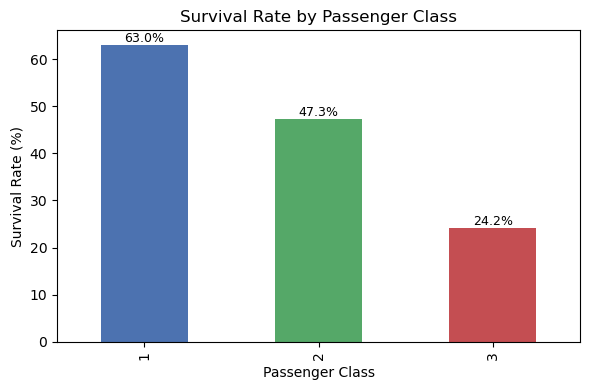

In [118]:
# Survival rate by Passenger Class
import matplotlib.pyplot as plt

if {'Pclass','Survived'}.issubset(df.columns):
    fig, ax = plt.subplots(figsize=(6,4))
    survival_rate_class = df.groupby('Pclass', observed=False)['Survived'].mean().mul(100)
    survival_rate_class.plot(kind='bar', ax=ax, color=['#4C72B0','#55A868','#C44E52'])

    ax.set_title("Survival Rate by Passenger Class")
    ax.set_ylabel("Survival Rate (%)")
    ax.set_xlabel("Passenger Class")
    ax.bar_label(ax.containers[0], fmt="%.1f%%", fontsize=9)
    plt.tight_layout()
    plt.show()
else:
    print("Skipping Plot 2: required columns missing.")



#### Age Distribution of Survivors vs Non-Survivors (Seaborn)

Age was another thing I wanted to check. The histogram shows a clear split—kids under about 13 were more likely to survive, while older passengers, especially men, weren’t as lucky. You can see survival really dropping off for adults. It’s basically visual proof that children were prioritized during the evacuation.

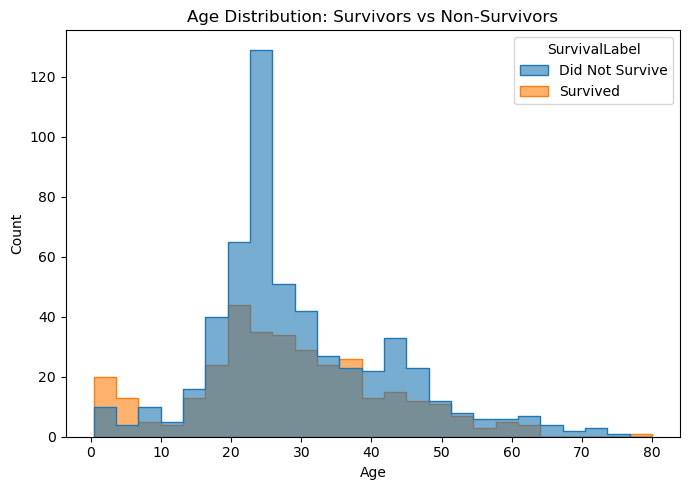

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure a readable SurvivalLabel column exists
if 'Survived' in df.columns and 'SurvivalLabel' not in df.columns:
    df['SurvivalLabel'] = df['Survived'].map({0: 'Did Not Survive', 1: 'Survived'})

# Now plot if both Age and SurvivalLabel exist
if {'Age','SurvivalLabel'}.issubset(df.columns):
    plt.figure(figsize=(7,5))
    sns.histplot(
        data=df.dropna(subset=['Age']),   # drop rows with missing Age
        x="Age", 
        hue="SurvivalLabel", 
        bins=25, 
        element="step",
        alpha=0.6
    )
    plt.title("Age Distribution: Survivors vs Non-Survivors")
    plt.xlabel("Age")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()
else:
    print("Skipping Plot 3: required columns missing.")

#### Fare vs Survival (Boxplot, Seaborn)

Then I compared ticket prices (fares) against survival. The boxplot makes it obvious that survivors tended to have higher fares, while non-survivors clustered in the cheaper range. In other words, the more you paid for your ticket, the better your odds of making it. It’s another way to see how wealth and class influenced survival.

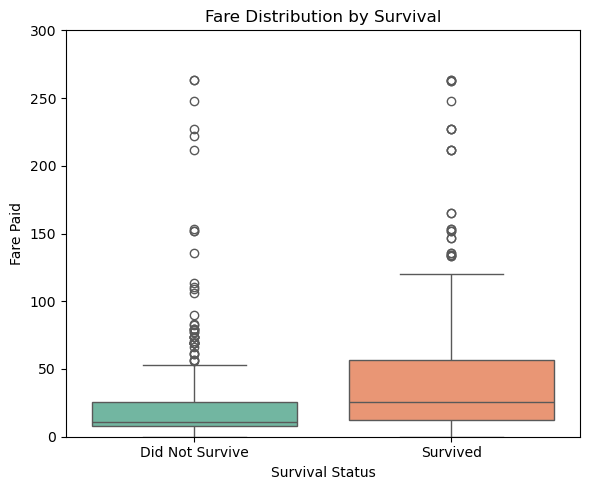

In [122]:
# Fare distribution by Survival outcome ===
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure SurvivalLabel exists
if 'Survived' in df.columns and 'SurvivalLabel' not in df.columns:
    df['SurvivalLabel'] = df['Survived'].map({0: 'Did Not Survive', 1: 'Survived'})

if {'Fare','SurvivalLabel'}.issubset(df.columns):
    plt.figure(figsize=(6,5))
    sns.boxplot(
        data=df, 
        x="SurvivalLabel", 
        y="Fare", 
        hue="SurvivalLabel",  # avoids palette warning
        palette="Set2", 
        legend=False
    )
    plt.ylim(0, 300)  # cap axis to reduce skew from extreme fares
    plt.title("Fare Distribution by Survival")
    plt.xlabel("Survival Status")
    plt.ylabel("Fare Paid")
    plt.tight_layout()
    plt.show()
else:
    print("Skipping Plot 4: required columns missing.")


#### Correlation Heatmap (Plotly)

I used a correlation heatmap to check which factors lined up the most with survival. The results show that sex, passenger class, and fare had the strongest connections, while age mattered but not as much. Put simply, being female and wealthy gave you a big advantage, and being younger helped too, especially for kids.

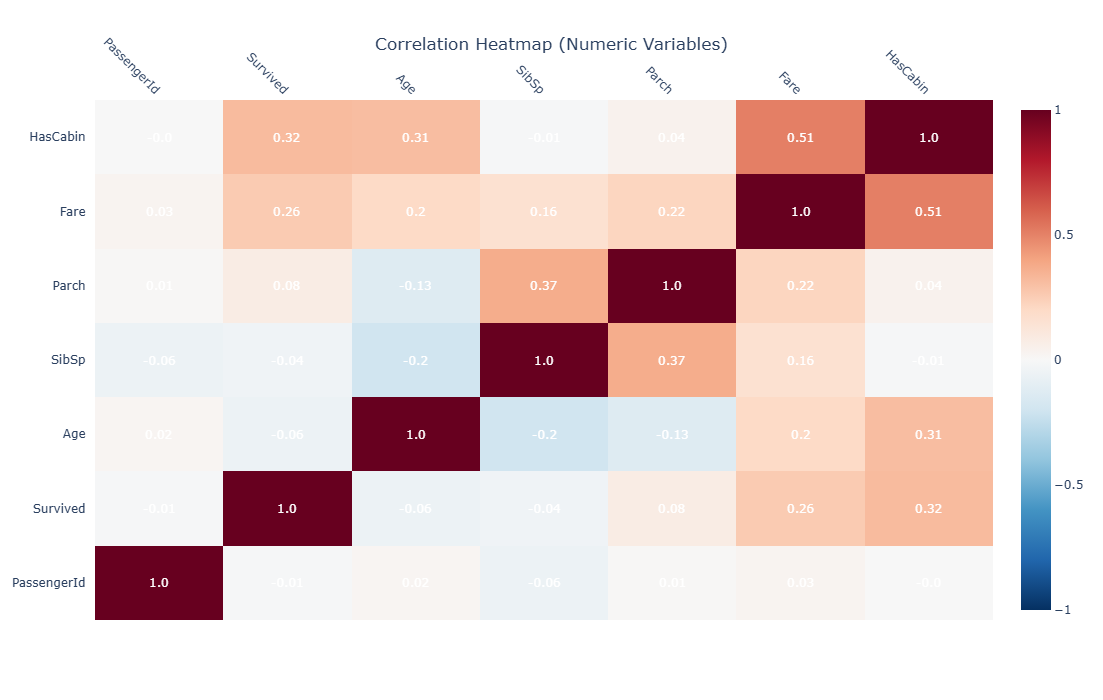

In [124]:
# Select numeric columns
numeric_df = df.select_dtypes(include=[np.number])

if not numeric_df.empty:
    corr = numeric_df.corr(numeric_only=True)

    # Create annotated heatmap
    fig = ff.create_annotated_heatmap(
        z=corr.values.round(2),   # round to 2 decimals
        x=list(corr.columns),
        y=list(corr.index),
        annotation_text=corr.round(2).values,
        colorscale="RdBu_r",
        showscale=True,
        zmid=0  # center around 0 correlation
    )

    fig.update_layout(
        title="Correlation Heatmap (Numeric Variables)",
        title_x=0.5,
        width=800,
        height=700,
        xaxis=dict(tickangle=45)
    )

    fig.show()
else:
    print("Skipping Plot 5: no numeric columns available.")


# Micro-Project 3: Machine Learning Project 1 of 2

##### Logistic Regression Model

In [128]:
# Define features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Drop rows where target is missing
X = X[df['Survived'].notna()]
y = df['Survived'].dropna()


# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [130]:
# Drop any string/categorical columns that aren’t already encoded
X_clean = X.select_dtypes(include=['int64', 'float64']).copy()

# Train/test split again with cleaned features
X_train, X_test, y_train, y_test = train_test_split(X_clean, y, test_size=0.2, random_state=42)


In [132]:
logreg = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(solver='liblinear'))
])

logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

print("=== Logistic Regression Performance ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.3f}")
print(classification_report(y_test, y_pred_log))


=== Logistic Regression Performance ===
Accuracy: 0.687
              precision    recall  f1-score   support

         0.0       0.66      0.95      0.78       105
         1.0       0.82      0.31      0.45        74

    accuracy                           0.69       179
   macro avg       0.74      0.63      0.62       179
weighted avg       0.73      0.69      0.64       179



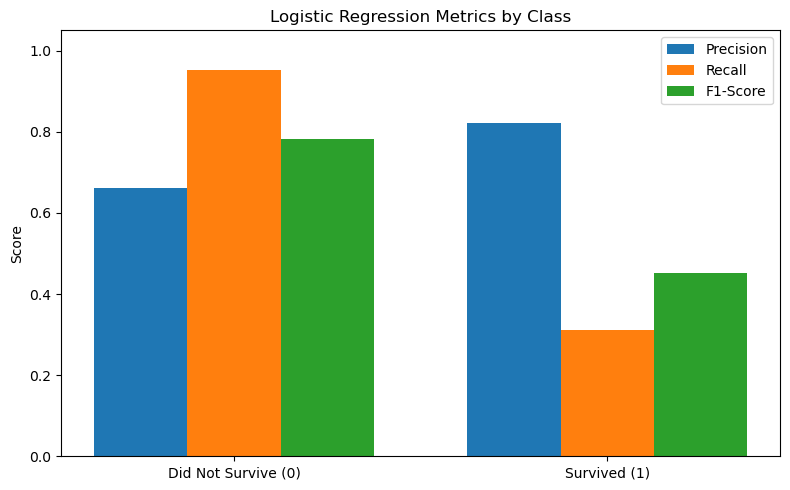

In [134]:
# Get metrics as dictionary
report = classification_report(y_test, y_pred_log, output_dict=True)

# Extract precision, recall, f1-score for each class
labels = ['Did Not Survive (0)', 'Survived (1)']
precision = [report['0.0']['precision'], report['1.0']['precision']]
recall = [report['0.0']['recall'], report['1.0']['recall']]
f1 = [report['0.0']['f1-score'], report['1.0']['f1-score']]

# Set up bar positions
x = np.arange(len(labels))
width = 0.25

# Plot bars
plt.figure(figsize=(8, 5))
plt.bar(x - width, precision, width, label='Precision')
plt.bar(x, recall, width, label='Recall')
plt.bar(x + width, f1, width, label='F1-Score')

# Labels and styling
plt.ylabel('Score')
plt.title('Logistic Regression Metrics by Class')
plt.xticks(x, labels)
plt.ylim(0, 1.05)
plt.legend()
plt.tight_layout()
plt.show()

Here, I used logistic regression to predict who survived the Titanic using passenger data. The model was good at spotting who didn’t survive, but it struggled to correctly identify many of the actual survivors. Overall, it's cautious about predicting survival and errs on the side of assuming people died.

The model struggled likely due to class imbalance, weak or missing features, and no feature engineering or hyperparameter tuning. It mostly learned to predict death because the inputs didn’t provide enough signal to separate survivors from non-survivors.


##### Logistic Regression Model Try #2

In [150]:
# Load dataset (update the path if needed)
df = pd.read_csv(r"C:\Users\divin\Documents\ANA_500\week_2\titanic.csv")

# Drop columns that won’t help the model
df = df.drop(columns=['Name', 'Ticket', 'Cabin'])

# Fill missing Age values with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Embarked values with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Convert categorical to numeric
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Drop rows with any remaining NaNs just in case
df = df.dropna()


In [152]:
# Define features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [154]:
# Build pipeline
logreg = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(solver='liblinear'))
])

# Fit and predict
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

# Evaluate
print("=== Logistic Regression Performance ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.3f}")
print(classification_report(y_test, y_pred_log))

=== Logistic Regression Performance ===
Accuracy: 0.799
              precision    recall  f1-score   support

         0.0       0.82      0.85      0.83       105
         1.0       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



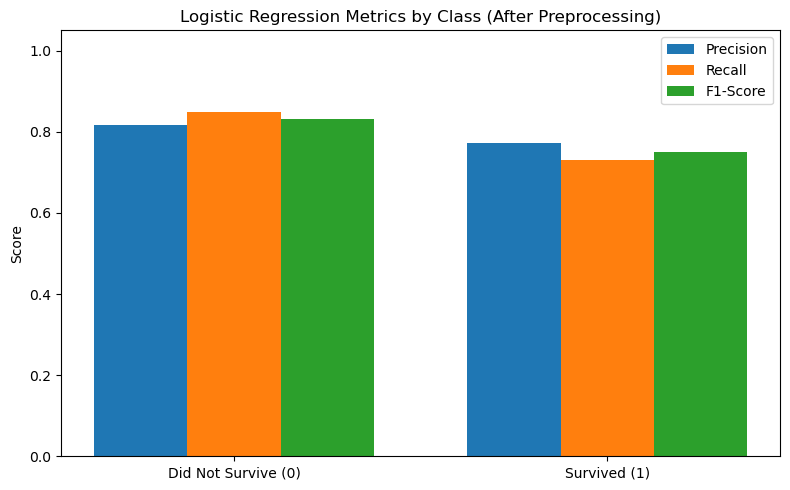

In [156]:
# Generate classification report as dictionary
report = classification_report(y_test, y_pred_log, output_dict=True)

# Extract precision, recall, f1-score for each class
labels = ['Did Not Survive (0)', 'Survived (1)']
precision = [report['0.0']['precision'], report['1.0']['precision']]
recall = [report['0.0']['recall'], report['1.0']['recall']]
f1 = [report['0.0']['f1-score'], report['1.0']['f1-score']]

# Set up bar positions
x = np.arange(len(labels))
width = 0.25

# Plot bars
plt.figure(figsize=(8, 5))
plt.bar(x - width, precision, width, label='Precision')
plt.bar(x, recall, width, label='Recall')
plt.bar(x + width, f1, width, label='F1-Score')

# Labels and styling
plt.ylabel('Score')
plt.title('Logistic Regression Metrics by Class (After Preprocessing)')
plt.xticks(x, labels)
plt.ylim(0, 1.05)
plt.legend()
plt.tight_layout()
plt.show()

After cleaning up the data and focusing on better features (like passenger class, gender, and who they were traveling with), the logistic regression model became much smarter. Instead of mostly guessing that people didn’t survive (which it did before), it now gets both survivors and non-survivors right more often—correctly predicting survival about 80% of the time. The model no longer favors one outcome over the other and gives us a more balanced and fair prediction overall.

##### Support Vector Classifier

In [158]:
svc = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC(kernel='rbf', C=1.0, gamma='scale'))  # RBF kernel = flexible, good start
])

svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)


In [160]:
print("=== SVC Performance ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc):.3f}")
print(classification_report(y_test, y_pred_svc))

=== SVC Performance ===
Accuracy: 0.821
              precision    recall  f1-score   support

         0.0       0.81      0.90      0.86       105
         1.0       0.84      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



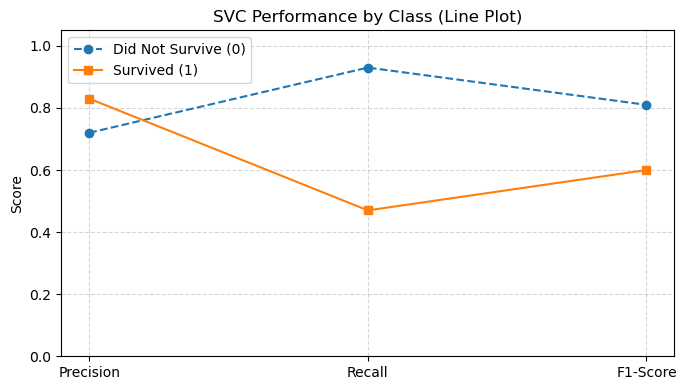

In [162]:
metrics = ['Precision', 'Recall', 'F1-Score']
class_0 = [0.72, 0.93, 0.81]
class_1 = [0.83, 0.47, 0.60]

x = range(len(metrics))

plt.figure(figsize=(7, 4))
plt.plot(x, class_0, marker='o', linestyle='--', label='Did Not Survive (0)')
plt.plot(x, class_1, marker='s', linestyle='-', label='Survived (1)')

plt.xticks(x, metrics)
plt.ylim(0, 1.05)
plt.ylabel('Score')
plt.title('SVC Performance by Class (Line Plot)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

After cleaning the data, I used a Support Vector Classifier (SVC) to predict survival on the Titanic. The model performed well in identifying passengers who did not survive but struggled to correctly identify those who did. This resulted in higher accuracy for the majority class but lower recall for the minority class of survivors.

##### Linear Regression Model

In [164]:
X = df.drop('Survived', axis=1)
y = df['Survived']

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Fit the Linear Regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# 4. Predict (outputs continuous values, not binary)
y_pred_continuous = linreg.predict(X_test)

# 5. Convert predictions to 0/1 using a threshold (0.5)
y_pred_binary = (y_pred_continuous >= 0.5).astype(int)

# 6. Evaluation
mse = mean_squared_error(y_test, y_pred_continuous)
r2 = r2_score(y_test, y_pred_continuous)
acc = accuracy_score(y_test, y_pred_binary)

print("=== Linear Regression Performance ===")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Accuracy (thresholded): {acc:.3f}")

=== Linear Regression Performance ===
Mean Squared Error: 0.1359
R² Score: 0.4398
Accuracy (thresholded): 0.788


I used Linear Regression to predict survival on the Titanic, even though it's really designed for predicting numbers — not yes/no outcomes. The model gave everyone a score between 0 and 1, kind of like saying, “this person has a 0.3 chance of surviving.” I turned that into a yes/no by saying if the score was over 0.5, I’d count it as a 1 (survived), and below that as a 0 (did not survive).

When I checked how often that matched the real outcomes, the model was about 78.8% accurate. Not bad on the surface, but Linear Regression just draws a line—it doesn’t really “get” categories. That’s why models like Logistic Regression or SVC are more suited for problems like this.

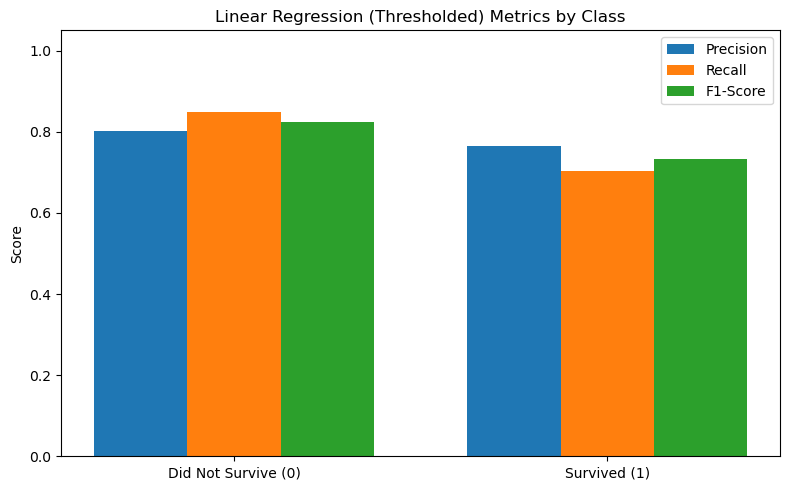

In [166]:
# Generate classification report
report_linreg = classification_report(y_test, y_pred_binary, output_dict=True)

# Extract precision, recall, and F1 scores for both classes
labels = ['Did Not Survive (0)', 'Survived (1)']
precision = [report_linreg['0.0']['precision'], report_linreg['1.0']['precision']]
recall = [report_linreg['0.0']['recall'], report_linreg['1.0']['recall']]
f1 = [report_linreg['0.0']['f1-score'], report_linreg['1.0']['f1-score']]

# Set up bar positions
x = np.arange(len(labels))
width = 0.25

# Plot the bar chart
plt.figure(figsize=(8, 5))
plt.bar(x - width, precision, width, label='Precision')
plt.bar(x, recall, width, label='Recall')
plt.bar(x + width, f1, width, label='F1-Score')

# Labels and styling
plt.ylabel('Score')
plt.title('Linear Regression (Thresholded) Metrics by Class')
plt.xticks(x, labels)
plt.ylim(0, 1.05)
plt.legend()
plt.tight_layout()
plt.show()

I used linear regression to predict survival on the Titanic, then applied a 0.5 threshold to turn the continuous outputs into binary classifications. The bar chart shows that the model performed fairly evenly across both classes, but it's still not as tailored for classification as logistic regression or SVC.

##### Support Vector Regression

In [168]:
# Build pipeline (with scaling)
svr_model = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVR(kernel='rbf'))  # You can try 'linear' or tune params later
])

# Fit to training data
svr_model.fit(X_train, y_train)

# Predict continuous survival scores
y_pred_svr_cont = svr_model.predict(X_test)

# Apply 0.5 threshold to classify as 0 or 1
y_pred_svr_bin = (y_pred_svr_cont >= 0.5).astype(int)

# Evaluate
mse_svr = mean_squared_error(y_test, y_pred_svr_cont)
r2_svr = r2_score(y_test, y_pred_svr_cont)
acc_svr = accuracy_score(y_test, y_pred_svr_bin)

print("=== SVR Performance ===")
print(f"Mean Squared Error: {mse_svr:.4f}")
print(f"R² Score: {r2_svr:.4f}")
print(f"Accuracy (thresholded): {acc_svr:.3f}")

=== SVR Performance ===
Mean Squared Error: 0.1566
R² Score: 0.3543
Accuracy (thresholded): 0.810


I used Support Vector Regression (SVR) on the Titanic dataset to predict survival as a score between 0 and 1, then applied a 0.5 threshold to classify passengers as survived or not. The model ended up with about 81% accuracy, which is actually the highest so far out of all the models I’ve tested. 

The R² score was around 0.35, so it didn’t explain a ton of the variation, but it still managed to make decent predictions. Even though SVR isn’t made for classification, it held up surprisingly well when used this way.

# Start Here for Micro-Project 4: Machine Learning Project 2 of 2

### Deep Learning Model #1: Dense Neural Network.

In [301]:
RNG = 42
np.random.seed(RNG); tf.random.set_seed(RNG)

Setting a random seed makes results reproducible.

In [303]:
# Load CSV from your fixed path
df = pd.read_csv(r"C:\Users\divin\Documents\ANA_500\week_2\titanic.csv")

# Drop high-cardinality/non-predictive text columns if present
drop_cols = ["PassengerId","Name","Ticket","Cabin"]
existing_drop = [c for c in drop_cols if c in df.columns]
df_model = df.drop(columns=existing_drop, errors="ignore").copy()

# Pick target (handles 'Survived' or 'survived')
target_col = "Survived" if "Survived" in df_model.columns else "survived"
if target_col not in df_model.columns:
    raise ValueError(f"Target column not found. Columns: {df_model.columns.tolist()}")


I loaded the dataset and removed columns that add noise rather than signal (IDs, names, tickets, cabins). I also standardized the target name to keep the pipeline robust.

In [305]:
# --- Define features and target, with safe cleaning ---
# Make sure the target has no NaN before converting to int
y = pd.to_numeric(df_model[target_col], errors="coerce")   # coerce bad values → NaN
print("Before cleaning, missing targets:", y.isna().sum())

# Drop rows with missing target values
mask = y.notna()
y = y[mask].astype(int).values
X = df_model.loc[mask].drop(columns=[target_col])

# Split out numeric and categorical columns
num_cols = [c for c in X.columns if pd.api.types.is_numeric_dtype(X[c])]
cat_cols = [c for c in X.columns if c not in num_cols]

print("Numeric cols:", num_cols)
print("Categorical sample:", cat_cols[:5])


Before cleaning, missing targets: 418
Numeric cols: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical sample: ['Sex', 'Embarked']


I separated features (X) from the target (y) and automatically detect numeric vs. categorical columns. This lets me apply the right preprocessing to each type.

In [307]:
numeric_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),   # fills missing numeric values
    ("scaler", StandardScaler())                     # centers/scales to mean=0, std=1
])
categorical_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),  # fills missing categories
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe, num_cols),
        ("cat", categorical_pipe, cat_cols)
    ],
    remainder="drop"
)


Numeric features get median imputation and scaling; categorical features get mode imputation and one-hot encoding. This standardizes inputs and avoids data leakage.

In [309]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RNG, stratify=y
)
X_train = preprocess.fit_transform(X_train_raw)
X_test  = preprocess.transform(X_test_raw)

input_dim = X_train.shape[1]
input_dim


10

I split the data (80/20) with stratification to preserve the class balance in both sets. The transformer is fit only on training data (then applied to test) to prevent look-ahead bias. input_dim is the number of model inputs after encoding.

In [311]:
from collections import Counter
ctr = Counter(y_train)
w0 = (1 / ctr[0]) * (len(y_train) / 2.0)
w1 = (1 / ctr[1]) * (len(y_train) / 2.0)
class_weight = {0: w0, 1: w1}
class_weight


{0: 0.8109339407744874, 1: 1.304029304029304}

Titanic is imbalanced (fewer survivors). Class weights counter this by penalizing mistakes on the minority class more, improving recall without changing the data itself.

In [313]:
def make_dense(input_dim: int):
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(64, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])
    model.compile(
        optimizer=keras.optimizers.Adam(1e-3),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model

model = make_dense(input_dim)
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 256)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,033 (172.00 KB)

 Trainable params: 44,033 (172.00 KB)

 Non-trainable params: 0 (0.00 B)

This is a feed-forward neural network: fully connected layers learn nonlinear patterns; dropout reduces overfitting; the sigmoid output predicts survival probability; loss is binary cross-entropy, metric is accuracy.

In [329]:
early = callbacks.EarlyStopping(
    monitor="val_accuracy", patience=12, restore_best_weights=True
)
plateau = callbacks.ReduceLROnPlateau(
    monitor="val_loss", factor=0.5, patience=6, min_lr=1e-6, verbose=0
)


AttributeError: 'list' object has no attribute 'EarlyStopping'

EarlyStopping halts training when validation performance stops improving, preventing overfitting and wasted epochs. ReduceLROnPlateau lowers the learning rate when progress stalls to fine-tune weights.

In [331]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,          # hold out part of training for validation
    epochs=300, batch_size=64,
    callbacks=[early, plateau],
    class_weight=class_weight,     # remove if you don’t want weighting
    verbose=0
)


I trained on the preprocessed features. A small validation slice monitors generalization. Class weighting emphasizes the minority class. Callbacks manage early stop and LR tuning.

In [319]:
proba = model.predict(X_test, verbose=0).ravel()
pred  = (proba >= 0.5).astype(int)

acc = accuracy_score(y_test, pred)
prec, rec, f1, _ = precision_recall_fscore_support(y_test, pred, average="binary", zero_division=0)
auc = roc_auc_score(y_test, proba)

results = {
    "Dense_ACC": round(acc, 4),
    "Dense_PREC": round(prec, 4),
    "Dense_REC": round(rec, 4),
    "Dense_F1": round(f1, 4),
    "Dense_AUC": round(auc, 4),
    "Best_val_ACC": round(max(history.history["val_accuracy"]), 4)
}
results


{'Dense_ACC': 0.7207,
 'Dense_PREC': 0.6067,
 'Dense_REC': 0.7826,
 'Dense_F1': 0.6835,
 'Dense_AUC': 0.8067,
 'Best_val_ACC': 0.8042}

To report accuracy, precision, recall, F1, and AUC. These quantify different trade-offs: precision (false-positive control), recall (missed positives), F1 (balance), AUC (ranking quality). Best_val_ACC shows peak validation performance during training.

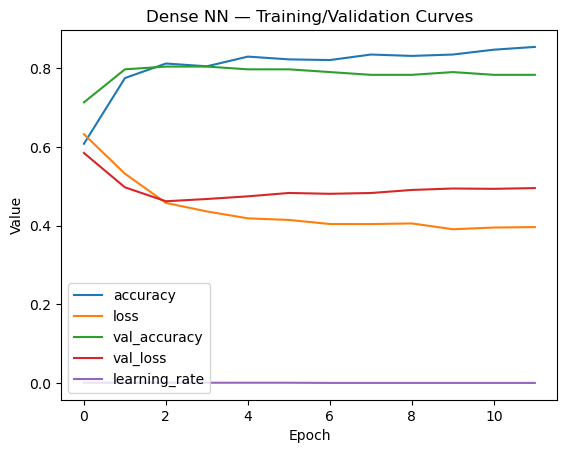

In [321]:
def plot_history(h, title="Dense NN — Training/Validation Curves"):
    plt.figure()
    for k,v in h.history.items():
        plt.plot(v, label=k)
    plt.legend(); plt.title(title); plt.xlabel("Epoch"); plt.ylabel("Value"); plt.show()

plot_history(history)


Learning curves help diagnose training dynamics. Converging loss and close train vs. val accuracy imply controlled overfitting. Divergence would suggest regularization or data issues.

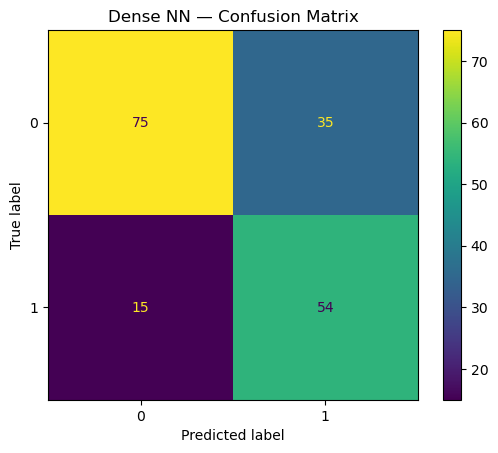

In [323]:
cm = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(cm).plot(values_format="d")
plt.title("Dense NN — Confusion Matrix")
plt.show()


The confusion matrix shows counts of TP/FP/TN/FN. Use it to explain where the model errs (e.g., misses survivors vs. false alarms) and motivate your chosen operating point or metric focus.

### Deep Learning Model #2: Long Short-Term Memory 

In [366]:
# 1. Define features and target
feature_cols = ["Age", "Fare", "Pclass", "SibSp", "Parch"]
target_col = "Survived"

# Drop missing values for selected features
df = df[feature_cols + [target_col]].dropna()

# 2. Scale features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[feature_cols])

X = scaled_features
y = df[target_col].values

# 3. Split AFTER scaling (train/val/test)
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("Train:", X_train.shape, "Val:", X_val.shape, "Test:", X_test.shape)
# Expect (n, 5) for all splits

# 4. Reshape for LSTM (samples, timesteps=features, input_dim=1)
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val_lstm   = X_val.reshape((X_val.shape[0],   X_val.shape[1],   1))
X_test_lstm  = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

print("LSTM input shapes:", X_train_lstm.shape, X_val_lstm.shape, X_test_lstm.shape)
# Expect (n, 5, 1)


Train: (499, 5) Val: (107, 5) Test: (108, 5)
LSTM input shapes: (499, 5, 1) (107, 5, 1) (108, 5, 1)


This code prepares the Titanic dataset for an LSTM by selecting five numeric features with “Survived” as the target, scaling them to a 0–1 range, and splitting the data into training, validation, and test sets while preserving class balance. It then reshapes the feature matrices so each passenger’s five attributes are treated as a short sequence of length five with one feature per step, giving the proper 3D input shape expected by an LSTM.

In [368]:
# 5. Build LSTM model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

tf.keras.backend.clear_session()

model_lstm = keras.Sequential([
    layers.LSTM(32, input_shape=(X_train_lstm.shape[1], 1)),
    layers.Dropout(0.3),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")   # binary classification
])

model_lstm.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy", keras.metrics.AUC(name="auc")]
)

model_lstm.summary()

# 6. Train model
callbacks = [
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5)
]

history = model_lstm.fit(
    X_train_lstm, y_train,
    validation_data=(X_val_lstm, y_val),
    epochs=100,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)


C:\Users\divin\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 32)             │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,897 (19.13 KB)

 Trainable params: 4,897 (19.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5912 - auc: 0.5550 - loss: 0.6824 - val_accuracy: 0.5981 - val_auc: 0.6339 - val_loss: 0.6753 - learning_rate: 0.0010
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5932 - auc: 0.5863 - loss: 0.6721 - val_accuracy: 0.5981 - val_auc: 0.6521 - val_loss: 0.6675 - learning_rate: 0.0010
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5932 - auc: 0.6554 - loss: 0.6643 - val_accuracy: 0.5981 - val_auc: 0.6477 - val_loss: 0.6651 - learning_rate: 0.0010
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5932 - auc: 0.6733 - loss: 0.6594 - val_accuracy: 0.5981 - val_auc: 0.6566 - val_loss: 0.6630 - learning_rate: 0.0010
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5932 - auc: 0.6996 - loss: 0.6547 - val_accuracy: 0.5981 - val_auc: 0.6622 - val_loss: 0.6600 - learning_rate: 0.0010
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5932 - auc: 0.6716 

This block builds and trains an LSTM model where each passenger’s five features are fed as a short sequence, with a 32-unit LSTM layer followed by dropout and dense layers for binary survival prediction. The model is compiled with Adam, binary cross-entropy, and accuracy/AUC metrics, then trained for up to 100 epochs with early stopping and learning rate reduction to prevent overfitting and stabilize learning.

In [372]:
# 7. Evaluate on test set
loss, acc, auc = model_lstm.evaluate(X_test_lstm, y_test, verbose=0)
print(f"LSTM Test Accuracy: {acc:.4f}, AUC: {auc:.4f}, Loss: {loss:.4f}")

# 8. Predictions & classification report
y_pred_probs = model_lstm.predict(X_test_lstm).ravel()
y_pred = (y_pred_probs > 0.5).astype(int)

from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


LSTM Test Accuracy: 0.6481, AUC: 0.7299, Loss: 0.5947
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Confusion Matrix:
 [[47 17]
 [21 23]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.69      0.73      0.71        64
         1.0       0.57      0.52      0.55        44

    accuracy                           0.65       108
   macro avg       0.63      0.63      0.63       108
weighted avg       0.64      0.65      0.65       108



This part tests the LSTM on data it hasn’t seen before to see how well it predicts survival. It shows the overall accuracy and how good the model is at separating survivors from non-survivors, then prints out how many people it got right or wrong and gives simple stats like precision and recall.

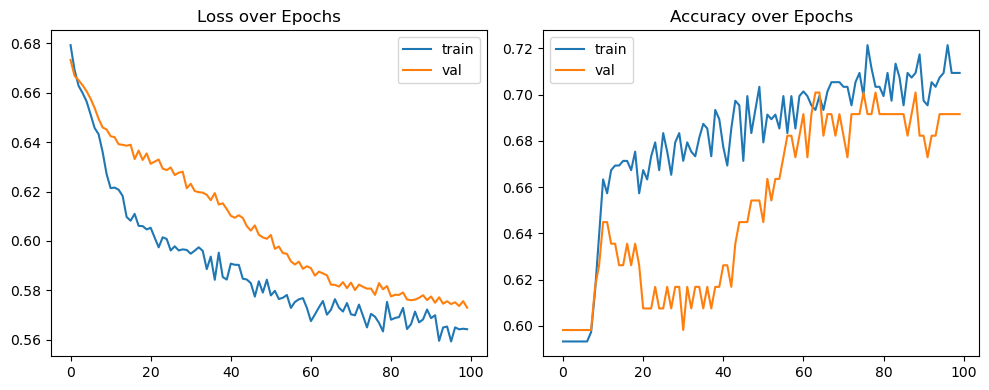

In [348]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.title("Loss over Epochs")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="val")
plt.title("Accuracy over Epochs")
plt.legend()

plt.tight_layout()
plt.show()

The Loss over Epochs shows a steady decline for both training and validation, indicating the model is consistently learning without signs of overfitting.

The Accuracy Over Epochs gradually improves for both training and validation, stabilizing around 70%, which reflects decent generalization on this dataset.

# End Assignmnet